In [41]:
setwd('/import/DB/fel/BJTC-204')

In [42]:
expr = read.table('./GPL17027.txt',header =T,sep = '\t',check.names = F)

In [43]:
dim(expr)

[1]   166 11979

In [44]:
head(expr,2)

,GSM,TYPE,PH,Gender,race,Age,10000_at,10001_at,10002_at,10003_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GSM2431721,Control,6.97,M,Caucasian,32,5.293475,5.692741,5.395376,4.577602,...,10.30256,10.55791,12.53443,12.59092,5.114451,4.765792,4.564303,4.274956,4.542969,4.399185
2,GSM2431722,Control,7.01,F,Caucasian,63,5.150656,5.525863,5.094417,4.551778,...,10.47679,10.69251,12.86738,12.71833,4.983718,4.545779,4.430805,4.199076,4.413532,4.407917


In [45]:
library(dplyr)

In [46]:
death = read.table('./table2.txt',header = T,sep = '\t') %>%  dplyr::filter(GSM %in% expr$GSM)

In [47]:
da = merge(death,expr,by = 'GSM')

In [48]:
head(da,2)

,GSM,death,TYPE,PH,Gender,race,Age,10000_at,10001_at,10002_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GSM2431721,0,Control,6.97,M,Caucasian,32,5.293475,5.692741,5.395376,...,10.30256,10.55791,12.53443,12.59092,5.114451,4.765792,4.564303,4.274956,4.542969,4.399185
2,GSM2431722,0,Control,7.01,F,Caucasian,63,5.150656,5.525863,5.094417,...,10.47679,10.69251,12.86738,12.71833,4.983718,4.545779,4.430805,4.199076,4.413532,4.407917


In [49]:
da2 = read.table('./GPL17027-2.txt',header =T,sep = '\t',check.names = F)

In [50]:
head(da2,2)

,GSM,death,TYPE,PH,Gender,race,Age,10000_at,10001_at,10002_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GSM2431799,0,Control,6.55,F,Caucasian,68,5.534668,5.952226,5.045592,...,12.18732,11.60957,13.36171,13.11999,4.880530,4.560711,4.253180,4.152873,4.328006,4.325865
2,GSM2431808,0,Control,7.21,F,Caucasian,73,5.547804,5.819636,4.964849,...,12.38909,11.95987,13.41210,13.17940,4.945355,4.437414,4.264888,4.134458,4.384143,4.342865


In [51]:
dim(da)

[1]   166 11980

In [52]:
dim(da2)

[1]    85 11980

In [53]:
da3 = rbind(da,da2)

In [54]:
length(unique(da3$GSM))

[1] 251

In [55]:
expr = da3

In [56]:
dim(da)

[1]   166 11980

In [57]:
rownames(expr) = expr[,1]
expr = expr[,-1]

In [58]:
info = expr[,1:6]

In [59]:
head(info,2)

,death,TYPE,PH,Gender,race,Age
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
GSM2431721,0,Control,6.97,M,Caucasian,32
GSM2431722,0,Control,7.01,F,Caucasian,63


In [60]:
dim(expr)

[1]   251 11979

In [61]:
table(info$TYPE)


Control     MDD 
    175      76 

In [62]:
exp = expr[,7:11979] %>% t() %>%  as.data.frame() %>%  tibble::rownames_to_column(.,'ID')

In [63]:
head(exp,2)

,ID,GSM2431721,GSM2431722,GSM2431723,GSM2431726,GSM2431727,GSM2431728,GSM2431731,GSM2431734,GSM2431735,...,GSM2431958,GSM2431959,GSM2431969,GSM2431970,GSM2431995,GSM2432065,GSM2432068,GSM2432070,GSM2432077,GSM2432081
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10000_at,5.293475,5.150656,5.221224,5.653483,5.022664,5.331675,5.324332,4.909831,4.789077,...,4.866788,5.042578,4.919501,5.035228,4.965306,5.224493,5.070423,5.045179,4.963966,4.948279
2,10001_at,5.692741,5.525863,5.353248,5.297997,5.586159,5.610716,5.849680,5.516485,5.722200,...,6.006612,6.396482,5.532209,6.337287,5.667979,6.377386,5.815019,5.965133,5.393812,6.163521


In [64]:
probe = read.table('./probe.txt',header =T,sep = '\t')

head(probe,2)

exp2 = left_join(probe,exp,by = 'ID') %>%  na.omit()  

exp2 = exp2[!duplicated(exp2$SYMBOL),]

rownames(exp2) = exp2[,2]
exp3 = exp2[,-c(1,2)] %>% t() %>%   as.data.frame() %>%  tibble::rownames_to_column(.,'GSM')

,ID,SYMBOL
,<chr>,<chr>
1,1_at,A1BG
2,10_at,NAT2


In [65]:
aaa2 = read.csv('./table1.csv',check.names = F)

aaa2 = aaa2[ complete.cases(aaa2[ , c(7)]),]

head(aaa2,2)

,SUBJECT,DIAGNOSIS,PH,GENDER,RACE,AGE,TOD,death,Toxicology
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>
2,54,Control,6.97,M,Caucasian,18,12.23,0,
4,52,Control,6.89,M,Caucasian,55,14.47,0,


In [66]:
exp4 = cbind(info,exp3)

In [68]:
save(exp4,file = 'exp4.rda')

In [28]:
colnames(aaa2)[2:6] = c('TYPE','PH','Gender','race','Age')

In [29]:
aaa2$TYPE = gsub('MD','MDD',aaa2$TYPE)

In [30]:
head(aaa2,2)

,SUBJECT,TYPE,PH,Gender,race,Age,TOD,death,Toxicology
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>
2,54,Control,6.97,M,Caucasian,18,12.23,0,
4,52,Control,6.89,M,Caucasian,55,14.47,0,


In [31]:
table(aaa2$TYPE)


Control     MDD 
     52      34 

In [32]:
aaa2$TOD

[1] 12.23 14.47  9.12  4.67 10.52  7.67 11.70  5.13 -5.98  7.28 14.85  2.25
[13] -3.60 11.47  7.03 12.85 12.17  4.98 -4.33  2.23 11.83 16.93  2.35  5.20
[25]  0.25  9.67 14.77 12.17  8.70 14.13  7.33 11.52 -1.87 11.68  3.08 13.35
[37] 13.22  9.85  1.32 -2.97  2.27  7.65  7.93 12.55  3.62 -4.75  9.87 12.20
[49] -5.02  0.92 -0.57 -0.63  9.47 14.68  7.18  1.17  5.48  6.32 -1.05  3.52
[61]  8.55 -1.02  3.25 -2.05  4.85 -4.72 11.17  5.58  5.98  6.50 15.30 -1.68
[73]  5.87  3.32  8.57  0.93  4.85  4.65  3.20 12.03  2.88  9.52 11.15  2.17
[85]  8.62  3.55

In [33]:
colnames(aaa2)[2:6]

[1] "TYPE"   "PH"     "Gender" "race"   "Age"

In [34]:
head(exp4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961
GSM2431723,0,Control,NA,F,Caucasian,70,GSM2431723,6.814676,6.261580,7.571414,...,8.630200,8.170023,6.914393,4.441707,5.981377,4.979711,7.519356,7.314417,5.538427,5.854754
GSM2431726,0,Control,NA,M,Caucasian,71,GSM2431726,7.550068,6.640444,8.030948,...,6.794395,7.583125,6.374021,4.632824,6.542643,5.345686,8.181581,6.815460,5.552289,6.125526
GSM2431727,0,Control,6.87,M,Caucasian,44,GSM2431727,6.336289,6.297053,7.947093,...,9.055285,8.653470,6.902694,4.552302,5.629537,5.043913,7.322026,7.413795,5.617718,5.891519
GSM2431728,0,MDD,7.05,M,Caucasian,66,GSM2431728,6.266404,5.972297,7.826966,...,8.993547,8.454228,6.859039,4.488690,5.823510,4.932490,7.483323,7.521739,5.512290,6.347157


In [35]:
exp5 = merge(aaa2, exp4, by = c('TYPE','PH','Gender','race','Age','death')) %>% na.omit()

In [36]:
table(exp5$TYPE)


Control     MDD 
    112      61 

In [461]:
write.csv(exp5,file = 'TOD.rela.csv')

In [39]:
exp5$TOD = ifelse(exp5$TOD < 0,exp5$TOD+24,exp5$TOD)

In [69]:
head(exp5,6)

,TYPE,PH,Gender,race,Age,death,SUBJECT,TOD,Toxicology,GSM,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Control,6.30,F,Asian,47,0,38,14.85,,GSM2431804,...,8.542607,8.301062,6.896081,4.490684,6.003487,4.956644,7.644263,7.408029,5.906133,5.876785
2,Control,6.30,F,Asian,47,0,38,14.85,,GSM2431997,...,8.926728,7.992052,6.624207,4.343531,5.806671,5.049495,7.564918,7.379268,5.695611,5.705419
3,Control,6.40,M,African American,59,0,3,0.92,,GSM2432040,...,8.878981,8.587653,6.628235,4.374113,5.297534,4.864552,7.318215,7.543359,5.863712,5.981731
4,Control,6.50,M,Caucasian,63,0,2,-0.57,,GSM2432045,...,9.035219,8.298866,6.491999,4.338877,5.348225,4.773315,7.394998,7.475051,5.696833,6.269534
5,Control,6.53,M,Caucasian,52,0,4,-5.02,,GSM2431943,...,8.940692,8.309396,6.601897,4.338805,5.699097,4.892797,7.329340,7.049498,6.436767,5.999408
6,Control,6.55,F,Caucasian,68,0,19,3.62,,GSM2431991,...,8.868911,8.130179,7.155901,4.498653,5.931903,4.813763,7.353592,7.835502,6.195664,5.994307


In [70]:
dim(exp5)

[1]   173 11885

In [41]:
control = exp5 %>%  dplyr::filter(TYPE == 'Control') %>% dplyr::select(TOD,NAT2:SCO2)  %>%  t() %>%  as.data.frame()

table(exp5$TYPE)

MD = exp5 %>%  dplyr::filter(TYPE != 'Control') %>% dplyr::select(TOD,NAT2:SCO2) %>%  t() %>%  as.data.frame()

head(MD,2)

colnames(control) = control[1,]
control = control[-1,]

colnames(control) = paste0('ZT',colnames(control),'_REP1')

colnames(MD) = MD[1,]
MD = MD[-1,]

colnames(MD) = paste0('ZT',colnames(MD),'_REP1')

colnames(MD)


Control     MDD 
    112      61 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TOD,11.150000,12.030000,8.620000,2.170000,9.520000,8.570000,22.980000,22.980000,21.950000,21.950000,...,4.850000,4.850000,3.200000,3.200000,5.480000,5.480000,3.25000,3.250000,0.930000,0.930000
NAT2,6.237568,5.352166,5.765387,5.894335,6.150689,6.366345,6.143621,6.368955,6.345062,6.335631,...,6.462201,6.259887,5.362228,6.103719,6.344407,5.989725,7.00259,6.316318,6.298266,5.357441


[1] "ZT11.15_REP1" "ZT12.03_REP1" "ZT8.62_REP1"  "ZT2.17_REP1"  "ZT9.52_REP1" 
 [6] "ZT8.57_REP1"  "ZT22.98_REP1" "ZT22.98_REP1" "ZT21.95_REP1" "ZT21.95_REP1"
[11] "ZT3.32_REP1"  "ZT3.52_REP1"  "ZT3.52_REP1"  "ZT1.17_REP1"  "ZT1.17_REP1" 
[16] "ZT4.65_REP1"  "ZT4.65_REP1"  "ZT19.28_REP1" "ZT19.28_REP1" "ZT22.32_REP1"
[21] "ZT22.32_REP1" "ZT6.32_REP1"  "ZT6.32_REP1"  "ZT7.18_REP1"  "ZT7.18_REP1" 
[26] "ZT7.18_REP1"  "ZT4.85_REP1"  "ZT4.85_REP1"  "ZT3.55_REP1"  "ZT22.95_REP1"
[31] "ZT22.95_REP1" "ZT22.95_REP1" "ZT8.55_REP1"  "ZT8.55_REP1"  "ZT11.17_REP1"
[36] "ZT11.17_REP1" "ZT5.58_REP1"  "ZT5.58_REP1"  "ZT5.98_REP1"  "ZT5.98_REP1" 
[41] "ZT14.68_REP1" "ZT14.68_REP1" "ZT14.68_REP1" "ZT9.47_REP1"  "ZT9.47_REP1" 
[46] "ZT9.47_REP1"  "ZT5.87_REP1"  "ZT15.3_REP1"  "ZT15.3_REP1"  "ZT2.88_REP1" 
[51] "ZT2.88_REP1"  "ZT4.85_REP1"  "ZT4.85_REP1"  "ZT3.2_REP1"   "ZT3.2_REP1"  
[56] "ZT5.48_REP1"  "ZT5.48_REP1"  "ZT3.25_REP1"  "ZT3.25_REP1"  "ZT0.93_REP1" 
[61] "ZT0.93_REP1"

In [42]:
colnames(control) = gsub('REP1.1','REP2',colnames(control) )

In [ ]:
control$GroundTruth = 0
MD$GroundTruth = 0
write.csv(control,file = 'control.csv')
write.csv(MD,file = 'MD.csv')

In [43]:
dim(exp4)

[1]   251 11882

In [44]:
data = exp4 %>%  dplyr::select(8:11882) %>%  t() %>%  as.data.frame()

In [45]:
head(data)

,GSM2431721,GSM2431722,GSM2431723,GSM2431726,GSM2431727,GSM2431728,GSM2431731,GSM2431734,GSM2431735,GSM2431737,...,GSM2431958,GSM2431959,GSM2431969,GSM2431970,GSM2431995,GSM2432065,GSM2432068,GSM2432070,GSM2432077,GSM2432081
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NAT2,6.918508,6.397328,6.814676,7.550068,6.336289,6.266404,6.563808,6.218975,6.059122,6.221634,...,5.650252,4.890141,5.618526,5.649107,5.610017,6.237568,5.745693,6.103719,5.894335,5.767362
ADA,5.958536,6.113981,6.261580,6.640444,6.297053,5.972297,5.957473,6.130789,6.002732,5.983142,...,5.547107,5.622665,5.714129,5.560912,5.709543,5.583211,5.550557,5.562499,5.533398,5.675797
CDH2,7.389671,7.629390,7.571414,8.030948,7.947093,7.826966,8.013628,8.341505,7.874299,7.967849,...,7.753341,7.637738,7.858467,7.619472,8.094593,7.579501,7.791573,7.953280,7.873714,7.569410
AKT3,5.293475,5.150656,5.221224,5.653483,5.022664,5.331675,5.324332,4.909831,4.789077,4.885067,...,4.866788,5.042578,4.919501,5.035228,4.965306,5.224493,5.070423,5.045179,4.963966,4.948279
MED6,5.692741,5.525863,5.353248,5.297997,5.586159,5.610716,5.849680,5.516485,5.722200,5.943328,...,6.006612,6.396482,5.532209,6.337287,5.667979,6.377386,5.815019,5.965133,5.393812,6.163521
NR2E3,5.395376,5.094417,5.022165,5.492633,5.078376,5.224105,5.073197,4.956384,5.060217,4.980131,...,4.840588,4.752539,4.835178,4.839157,4.931567,4.884846,4.939863,4.926293,4.949183,4.811335


In [46]:
group = exp4[,c(7,2)]

### limma

In [47]:
dim(exp4)

[1]   251 11882

,GSM2431721,GSM2431722,GSM2431723,GSM2431726,GSM2431727
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NAT2,6.918508,6.397328,6.814676,7.550068,6.336289
ADA,5.958536,6.113981,6.261580,6.640444,6.297053
CDH2,7.389671,7.629390,7.571414,8.030948,7.947093
AKT3,5.293475,5.150656,5.221224,5.653483,5.022664
MED6,5.692741,5.525863,5.353248,5.297997,5.586159


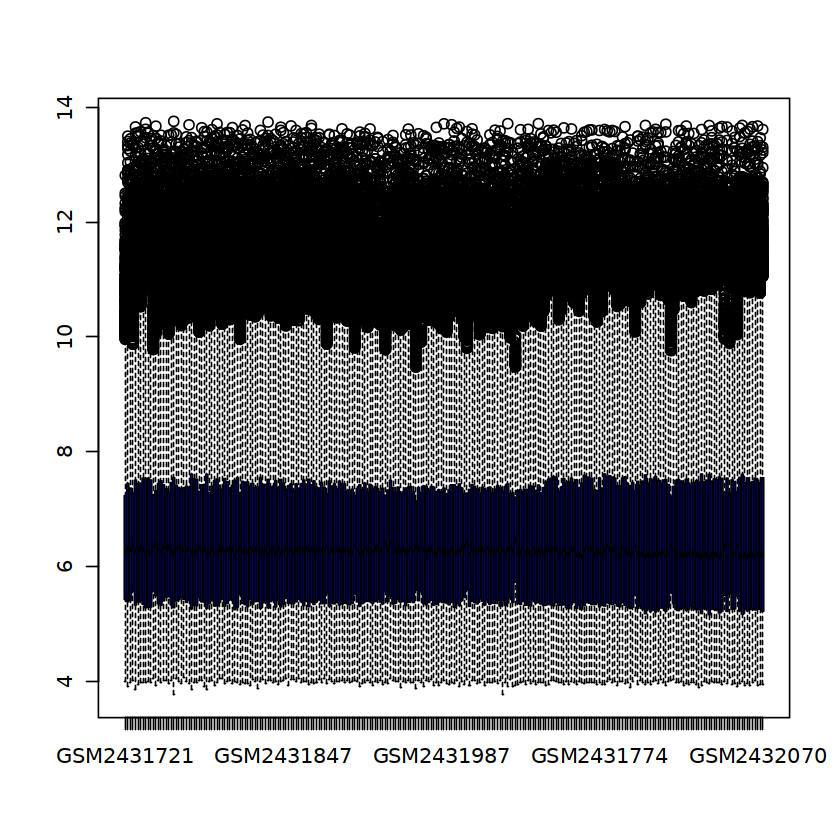

In [48]:
exprSet = data
par(mfrow=c(1,1))
boxplot(data.frame(exprSet),col="blue") ## 画箱式图，比较数据分布情况
exprSet[1:5,1:5]

In [49]:
group <- group[,2] #定义比较组，按照癌症和正常样品数目修改#
design <- model.matrix(~0+factor(group))#把group设置成一个model matrix#

In [50]:
library(limma)

Warning message:
"package 'limma' was built under R version 4.2.3"


In [51]:


colnames(design)=levels(factor(group))
rownames(design)=colnames(exprSet)

In [52]:
fit <- lmFit(exprSet,design)
cont.matrix<-makeContrasts(paste0(rev(unique(group)),collapse = "-"),levels = design)
fit2=contrasts.fit(fit,cont.matrix)
fit2 <- eBayes(fit2)  ## default no trend !!!
##eBayes() with trend=TRUE
tempOutput = topTable(fit2,coef=1,n=Inf,adjust="BH") 
nrDEG = na.omit(tempOutput) 

In [53]:
foldChange=0 #fold change=1意思是差异是两倍
padj=0.05#padj=0.05意思是矫正后P值小于0.05

In [54]:
diff <- nrDEG

In [56]:
diffSig = diff[(diff$P.Value < padj & (diff$logFC>foldChange | diff$logFC<(-foldChange))),]

In [514]:
save(exp4,diffSig,file = 'step1.rda')

In [515]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

In [57]:
data <- 
  nrDEG %>% 
  mutate(change = as.factor(ifelse(P.Value < 0.05 & abs(logFC) > 0,
                                   ifelse(logFC > 0 ,'Up','Down'),'NOT'))) %>% 
  tibble::rownames_to_column('gene')

In [40]:
table(data$change)

ERROR: Error in data$change: object of type 'closure' is not subsettable


In [61]:
write.csv(data,file = 'matrix3.diffgene.76mdd.175control.csv')

In [517]:
rownames(data) = data[,1]

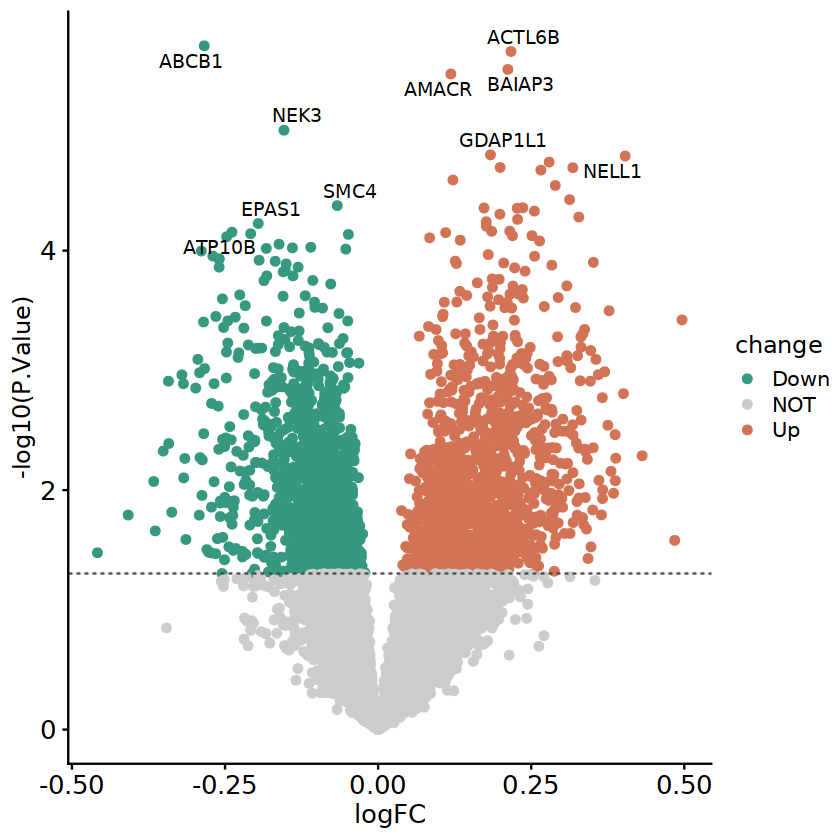

In [518]:
top_5 <- bind_rows(   
      data %>%
        filter(change == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(5),
      data %>%
        filter(change == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(5)
    )

    ggplot(data=data,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=change),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() +
  theme(axis.title.x = element_text(size = 15))+
  theme(axis.text.x = element_text(size = 15))+
  theme(axis.text.y = element_text(size = 15))+
  theme(plot.title = element_text(size = 15,face = 4, hjust =0.5))
    ggsave('Volcano.pdf',height = 8,width = 8)

In [519]:
library(clusterProfiler)
library(org.Hs.eg.db)

In [520]:
gene_symbol <- bitr(geneID = rownames(diffSig),  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
gene <- gene_symbol[,2]
BP <- enrichGO(gene = gene,  
               keyType = "ENTREZID",  
               OrgDb=org.Hs.eg.db,  
               ont = "BP",   
               pvalueCutoff = 0.05,  
               pAdjustMethod = "fdr", 
               minGSSize = 5,   
               maxGSSize = 500,  
               qvalueCutoff = 1,  
               readable = TRUE) 

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(geneID = rownames(diffSig), fromType = "SYMBOL", toType = c("ENTREZID"), :
"9.35% of input gene IDs are fail to map..."


In [521]:
grep('circadian',BP@result$Description,value = T)

[1] "circadian sleep/wake cycle, REM sleep"                   
 [2] "circadian rhythm"                                        
 [3] "regulation of circadian rhythm"                          
 [4] "circadian sleep/wake cycle process"                      
 [5] "circadian sleep/wake cycle, sleep"                       
 [6] "circadian sleep/wake cycle"                              
 [7] "regulation of circadian sleep/wake cycle"                
 [8] "regulation of circadian sleep/wake cycle, sleep"         
 [9] "positive regulation of circadian rhythm"                 
[10] "circadian regulation of gene expression"                 
[11] "circadian behavior"                                      
[12] "positive regulation of circadian sleep/wake cycle, sleep"
[13] "regulation of circadian sleep/wake cycle, non-REM sleep" 
[14] "negative regulation of circadian rhythm"                 
[15] "circadian sleep/wake cycle, non-REM sleep"               
[16] "entrainment of circadian clock by photoperiod"           
[17] "entrainment of circadian clock"

In [522]:
grep('circadian',BP@result$Description)

[1] 1555 1608 1615 2381 2744 2840 3119 3583 4120 5206 5437 5946 6380 6532 6789
[16] 7543 7837

In [523]:
BP@result[1162,]

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:1900046,GO:1900046,regulation of hemostasis,18/2627,72/18903,0.008411595,0.05917305,0.04569766,PLAUR/FGG/CAV1/F12/EDN1/TSPAN8/PLAT/TFPI/KLKB1/PROS1/SERPINB2/FGA/PLAU/C1QTNF1/HPSE/PRDX2/EPHB2/F2R,18


In [524]:
library(org.Mm.eg.db)
library(clusterProfiler)
gene <- bitr(rownames(diff),     #转换的列是nrDEG的列名
             fromType = "SYMBOL",     #需要转换ID类型
             toType =  "ENTREZID",    #转换成的ID类型
             OrgDb = org.Hs.eg.db)    #对应的物种，小鼠的是org.Mm.eg.db

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(diff), fromType = "SYMBOL", toType = "ENTREZID", :
"9.75% of input gene IDs are fail to map..."


In [525]:
gene$logFC <- diff$logFC[match(gene$SYMBOL,rownames(diff))]

In [526]:
geneList=gene$logFC
names(geneList)=gene$ENTREZID 
#按照logFC的值来排序geneList
geneList=sort(geneList,decreasing = T)
head(geneList)

478      6857       885      4745      1114     26960 
0.4962927 0.4843177 0.4311458 0.4034330 0.4006354 0.3880487

In [527]:
GOID <- c("GO:0007623")

In [528]:
GOgeneID <- get(GOID, org.Hs.egGO2ALLEGS) %>% mget(org.Hs.egSYMBOL) %>% unlist()

In [529]:
#write.table(t(as.data.frame(GOgeneID)) %>% as.data.frame(),file = 'circadian.gmt',col.names = F,quote = F,sep = '\t')

In [530]:
pathway<-read.gmt("./circadian.gmt")

In [531]:
alldiff <- diff[order(diff$logFC,decreasing = T),]
FCgenelist <- alldiff$logFC                 # 把数值保存到一维向量中
names(FCgenelist) <- row.names(alldiff)

In [532]:
y <- GSEA(FCgenelist,TERM2GENE =pathway,pvalueCutoff = 1
         )

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



In [533]:
y@result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<chr>,<chr>
circadian rhythm,circadian rhythm,circadian rhythm,173,0.2695399,1.056772,0.3587082,0.3587082,NA,3138,"tags=34%, list=26%, signal=25%",MAPK9/ASS1/OPN3/MAGED1/FBXW7/CSNK1D/MAPK10/EGR3/HOMER1/JUND/FBXW11/SIAH2/CRH/PRKDC/MTA1/PRKCG/DBP/HNRNPD/CARTPT/PPP1CB/PRMT5/ADORA1/NONO/NDUFA9/SRD5A1/SFPQ/KLF10/PSPC1/IMPDH2/DDB1/KCND2/UBE3A/MYBBP1A/ADCY1/PPP1CA/GFPT1/MYCBP2/NR1D2/ID2/AHCY/TOP1/GNA11/PPARGC1A/NR2F6/NLGN1/NPAS2/MTOR/RBM4/USP7/NR0B2/HNRNPU/OGT/NR1D1/OPRL1/CSNK1E/PARP1/ATG7/CREB1/MAGEL2
